In [25]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal
import pickle
from matplotlib.colors import Normalize
import cv2
import tqdm
import shutil

In [4]:
fly = 314
load_directory = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}/anat_0/moco'
os.listdir(load_directory)

['anatomy_channel_1_moc_mean_clean.nii',
 'anatomy_channel_2_moc_mean.nii',
 'anatomy_channel_2_moco.h5',
 'anatomy_channel_1_moc_mean.nii',
 'motcorr_params.npy',
 'motion_correction.png',
 'anatomy_channel_1_moco.h5']

In [19]:
flies = [312,313,314,315,316,317]
anats = []
for fly in flies:
    load_directory = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}/anat_0/moco/anatomy_channel_1_moc_mean.nii'
    anat = ants.image_read(load_directory).numpy()
    anats.append(anat)
anats = np.asarray(anats)

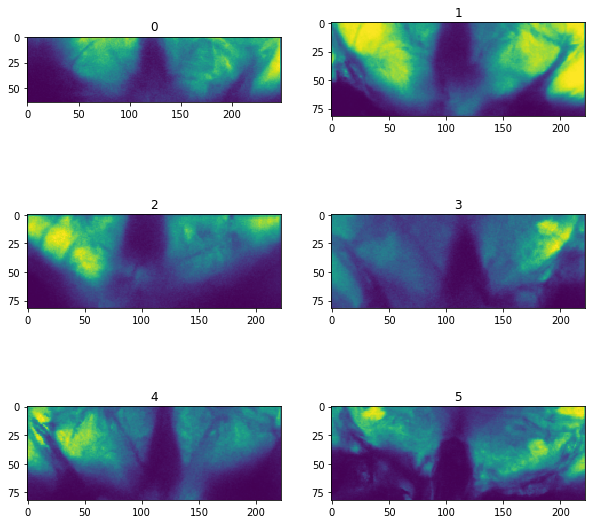

In [28]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(anats[i][:,:,20].T)
    plt.title(i)

In [35]:
dir_ = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230717_IPS_dataset_template/'
os.listdir(dir_)

['raw_anats', 'sharp_anats', 'clean_anats', 'affine_0']

In [26]:
flies = [312,313,314,315,316,317]
target_dir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20230717_IPS_dataset_template/raw_anats'
for fly in flies:
    file = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}/anat_0/moco/anatomy_channel_1_moc_mean.nii'
    target_file = os.path.join(target_dir,F'{fly}.nii')
    shutil.copyfile(file, target_file)

In [29]:
os.listdir(dir_)

['315.nii', '312.nii', '316.nii', '317.nii', '314.nii', '313.nii']

In [ ]:
# for file in os.listdir(dir_):
#     path = os.path.join(dir_,file)
#     data = ants.image_read(path)
    